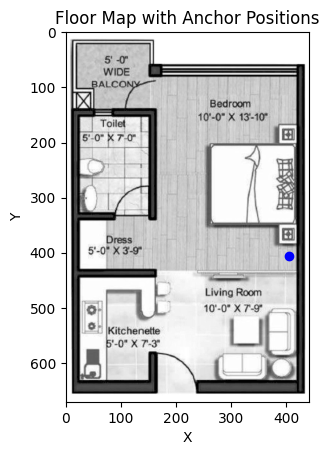

Optimized Anchor Positions for 4 Anchors:
Anchor 1: (405.4999792102434, 405.4999833245656)


In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions):
    # Calculate the minimum distance between any tag and an anchor
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in all_tag_positions]
        min_distances.append(min(distances))
    # The error is the sum of these minimum distances
    return sum(min_distances)

# Define optimization function
def optimize_anchor_positions(anchor_positions, num_anchors):
    # Flatten the anchor positions for optimization
    initial_guess = np.array(anchor_positions).flatten()
    # Optimization constraints: each coordinate should be between 0 and the maximum image dimension
    bounds = [(0, max(floor_map_image.shape))] * len(initial_guess)
    result = minimize(uwb_localization_error, initial_guess, bounds=bounds, method='Nelder-Mead')
    optimized_positions = result.x.reshape((-1, 2))
    return optimized_positions

# Number of anchors to optimize
num_anchors = 4

# Generate some example tag positions (you should replace this with actual tag positions)
all_tag_positions = np.random.randint(0, max(floor_map_image.shape), size=(10, 2))

# Optimize anchor positions
optimized_positions = optimize_anchor_positions(anchor_positions, num_anchors)

# Plot the floor map
plt.imshow(floor_map_image, cmap='gray')
plt.title('Floor Map with Anchor Positions')
plt.xlabel('X')
plt.ylabel('Y')

# Plot optimized anchor positions
for i, pos in enumerate(optimized_positions):
    plt.plot(pos[0], pos[1], 'bo')

plt.show()

# Print out the optimized positions
print(f"Optimized Anchor Positions for {num_anchors} Anchors:")
for i, pos in enumerate(optimized_positions):
    print(f"Anchor {i+1}: ({pos[0]}, {pos[1]})")


Anchor 1: 220 335


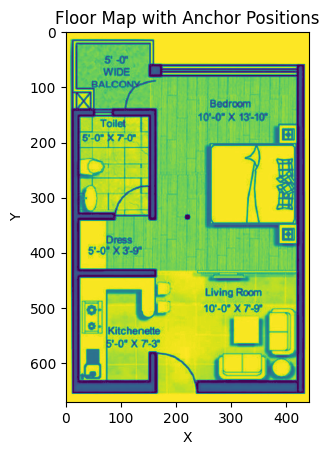

In [ ]:
-import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions):
    # Calculate the minimum distance between any tag and an anchor
    min_distances = []
    for anchor_pos in anchor_positions.reshape((-1, 2)):
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in all_tag_positions]
        min_distances.append(min(distances))
    # The error is the sum of these minimum distances
    return sum(min_distances)

# Define optimization function
def optimize_anchor_positions(anchor_positions, num_anchors):
    # Flatten the anchor positions for optimization
    initial_guess = np.array(anchor_positions).flatten()
    # Define bounds for optimization
    bounds = [(0, floor_map_image.shape[1]) for _ in range(len(initial_guess)//2)] + [(0, floor_map_image.shape[0]) for _ in range(len(initial_guess)//2)]
    result = minimize(uwb_localization_error, initial_guess, bounds=bounds, method='Nelder-Mead')
    optimized_positions = result.x.reshape((-1, 2))
    return optimized_positions

# Number of anchors to optimize
num_anchors = 4

# Generate some example tag positions (you should replace this with actual tag positions)
all_tag_positions = np.random.randint(0, max(floor_map_image.shape), size=(10, 2))

# Optimize anchor positions
optimized_positions = optimize_anchor_positions(np.array(anchor_positions), num_anchors)


# Plot the floor map
plt.imshow(floor_map_image, cmap='gray')
plt.title('Floor Map with Anchor Positions')
plt.xlabel('X')
plt.ylabel('Y')

# Display all anchor positions
for i, contour in enumerate(contours):
    # Calculate the moments of the contour
    M = cv2.moments(contour)

    # Calculate the center of mass (centroid) of the contour
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        # Draw a circle at the center of the contour
        cv2.circle(floor_map_image, (cx, cy), 5, (0, 0, 255), -1)
        # Print the coordinates of the center of the contour
        print(f"Anchor {i+1}:", cx, cy)

# Display the image with all anchors
plt.imshow(floor_map_image)
plt.show()



[[367 103]
 [145 199]
 [366 175]
 [117 394]
 [315 259]]


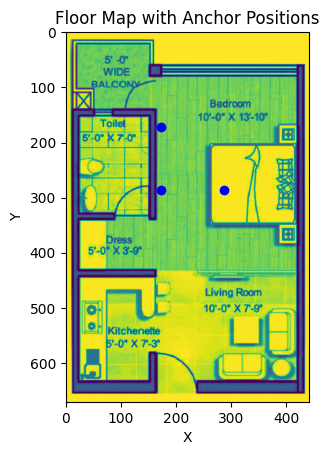

Optimized Anchor Positions for 3 Anchors:
Anchor 1: (171.99997247412523, 171.99998020073423)
Anchor 2: (287.00002041047264, 287.0000373366961)
Anchor 3: (171.99997275265306, 286.9999945084799)


In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))
# Define the UWB localization error function
def uwb_localization_error(anchor_positions):
    # Calculate the minimum distance between any tag and an anchor
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in all_tag_positions]
        min_distances.append(min(distances))
    # The error is the sum of these minimum distances
    return sum(min_distances)

# Modify the optimize_anchor_positions function to randomize initial positions
def optimize_anchor_positions(anchor_positions, num_anchors):
    optimized_positions = []
    bounds = [(0, max(floor_map_image.shape))] * len(anchor_positions) * 2
    for _ in range(num_anchors):
        # Randomly initialize anchor positions within the bounds
        initial_guess = np.random.uniform(0, max(floor_map_image.shape), size=(len(anchor_positions), 2))
        initial_guess = initial_guess.flatten()
        result = minimize(uwb_localization_error, initial_guess, bounds=bounds, method='Nelder-Mead')
        optimized_positions.append(result.x.reshape((-1, 2)))
    return optimized_positions


# Number of anchors to optimize
num_anchors = 3
# Generate some example tag positions (you should replace this with actual tag positions)
all_tag_positions = np.random.randint(100, 400, size=(5, 2))
print(all_tag_positions)
# Optimize anchor positions
optimized_positions = optimize_anchor_positions(anchor_positions, num_anchors)

# Plot the floor map
plt.imshow(floor_map_image, cmap='gray')
plt.title('Floor Map with Anchor Positions')
plt.xlabel('X')
plt.ylabel('Y')

# Plot optimized anchor positions
for i, positions in enumerate(optimized_positions):
    for pos in positions:
        plt.plot(pos[0], pos[1], 'bo')
plt.imshow(floor_map_image)
plt.show()

# Print out the optimized positions
print(f"Optimized Anchor Positions for {num_anchors} Anchors:")
for i, positions in enumerate(optimized_positions):
    for j, pos in enumerate(positions):
        anchor_number = i + j*num_anchors + 1
        print(f"Anchor {anchor_number}: ({pos[0]}, {pos[1]})")




Enter the number of anchors: 2
Enter the number of tag positions: 1
Enter x-coordinate of tag position 1: 400
Enter y-coordinate of tag position 1: 50


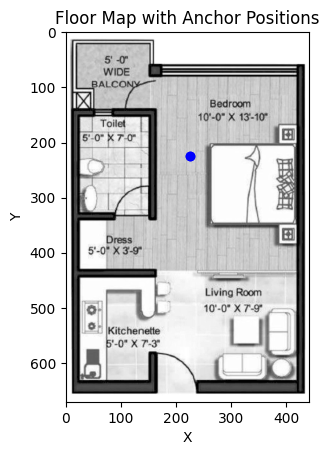

Optimized Anchor Positions for 2 Anchors:
Anchor 1: (225.0000310317709, 224.99999567625852)
Anchor 2: (225.00001867582267, 224.99997489077072)


In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions):
    # Calculate the minimum distance between any tag and an anchor
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in all_tag_positions]
        min_distances.append(min(distances))
    # The error is the sum of these minimum distances
    return sum(min_distances)

# Modify the optimize_anchor_positions function to randomize initial positions
def optimize_anchor_positions(anchor_positions, num_anchors):
    optimized_positions = []
    bounds = [(0, max(floor_map_image.shape))] * len(anchor_positions) * 2
    for _ in range(num_anchors):
        # Randomly initialize anchor positions within the bounds
        initial_guess = np.random.uniform(0, max(floor_map_image.shape), size=(len(anchor_positions), 2))
        initial_guess = initial_guess.flatten()
        result = minimize(uwb_localization_error, initial_guess, bounds=bounds, method='Nelder-Mead')
        optimized_positions.append(result.x.reshape((-1, 2)))
    return optimized_positions

# Input number of anchors
num_anchors = int(input("Enter the number of anchors: "))

# Input tag positions
num_tags = int(input("Enter the number of tag positions: "))
all_tag_positions = []
for i in range(num_tags):
    tag_x = float(input(f"Enter x-coordinate of tag position {i+1}: "))
    tag_y = float(input(f"Enter y-coordinate of tag position {i+1}: "))
    all_tag_positions.append((tag_x, tag_y))

# Optimize anchor positions
optimized_positions = optimize_anchor_positions(anchor_positions, num_anchors)

# Plot the floor map
plt.imshow(floor_map_image, cmap='gray')
plt.title('Floor Map with Anchor Positions')
plt.xlabel('X')
plt.ylabel('Y')

# Plot optimized anchor positions
for i, positions in enumerate(optimized_positions):
    for pos in positions:
        plt.plot(pos[0], pos[1], 'bo')

plt.show()

# Print out the optimized positions
print(f"Optimized Anchor Positions for {num_anchors} Anchors:")
for i, positions in enumerate(optimized_positions):
    for j, pos in enumerate(positions):
        anchor_number = i + j*num_anchors + 1
        print(f"Anchor {anchor_number}: ({pos[0]}, {pos[1]})")


[[115 361]
 [139 386]
 [267 354]
 [253 107]
 [222 371]]


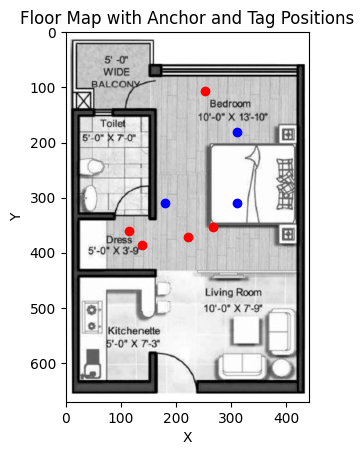

Optimized Anchor Positions for 3 Anchors:
Anchor 1: (310.4999844462211, 180.00001788195192)
Anchor 2: (310.5000409802859, 310.5000003231815)
Anchor 3: (179.99997163821598, 310.5000213765592)


In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions):
    # Calculate the minimum distance between any tag and an anchor
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in all_tag_positions]
        min_distances.append(min(distances))
    # The error is the sum of these minimum distances
    return sum(min_distances)

# Modify the optimize_anchor_positions function to randomize initial positions
def optimize_anchor_positions(anchor_positions, num_anchors):
    optimized_positions = []
    bounds = [(0, max(floor_map_image.shape))] * len(anchor_positions) * 2
    for _ in range(num_anchors):
        # Randomly initialize anchor positions within the bounds
        initial_guess = np.random.uniform(0, max(floor_map_image.shape), size=(len(anchor_positions), 2))
        initial_guess = initial_guess.flatten()
        result = minimize(uwb_localization_error, initial_guess, bounds=bounds, method='Nelder-Mead')
        optimized_positions.append(result.x.reshape((-1, 2)))
    return optimized_positions

# Number of anchors to optimize
num_anchors = 3

# Generate some example tag positions (you should replace this with actual tag positions)
all_tag_positions = np.random.randint(100, 400, size=(5, 2))
print(all_tag_positions)
# Optimize anchor positions
optimized_positions = optimize_anchor_positions(anchor_positions, num_anchors)

# Plot the floor map
plt.imshow(floor_map_image, cmap='gray')
plt.title('Floor Map with Anchor and Tag Positions')
plt.xlabel('X')
plt.ylabel('Y')

# Plot anchor positions
for i, positions in enumerate(optimized_positions):
    for pos in positions:
        plt.plot(pos[0], pos[1], 'bo')  # Blue color for anchor positions

# Plot tag positions
for pos in all_tag_positions:
    plt.plot(pos[0], pos[1], 'ro')  # Red color for tag positions

plt.show()

# Print out the optimized positions
print(f"Optimized Anchor Positions for {num_anchors} Anchors:")
for i, positions in enumerate(optimized_positions):
    for j, pos in enumerate(positions):
        anchor_number = i + j*num_anchors + 1
        print(f"Anchor {anchor_number}: ({pos[0]}, {pos[1]})")


Enter the number of tags: 7
Enter the number of anchors: 3


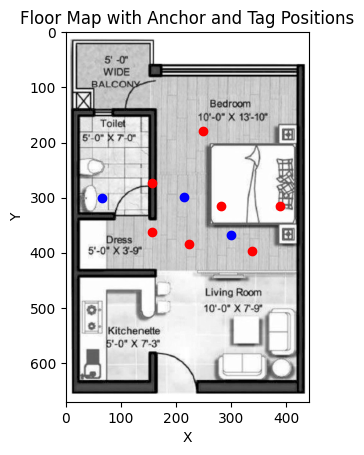

Optimized Anchor Positions for 3 Anchors:
Anchor 1: (66.39338972064472, 301.15049357493314)
Anchor 2: (298.999980532695, 367.5000269219719)
Anchor 3: (213.4999723155061, 298.99998279365593)


In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions):
    # Calculate the minimum distance between any tag and an anchor
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in all_tag_positions]
        min_distances.append(min(distances))
    # The error is the sum of these minimum distances
    return sum(min_distances)

# Modify the optimize_anchor_positions function to randomize initial positions
def optimize_anchor_positions(anchor_positions, num_anchors):
    optimized_positions = []
    bounds = [(0, max(floor_map_image.shape))] * len(anchor_positions) * 2
    for _ in range(num_anchors):
        # Randomly initialize anchor positions within the bounds
        initial_guess = np.random.uniform(0, max(floor_map_image.shape), size=(len(anchor_positions), 2))
        initial_guess = initial_guess.flatten()
        result = minimize(uwb_localization_error, initial_guess, bounds=bounds, method='Nelder-Mead')
        optimized_positions.append(result.x.reshape((-1, 2)))
    return optimized_positions

# Input number of tags
num_tags = int(input("Enter the number of tags: "))

# Generate random tag positions
all_tag_positions = np.random.randint(100, 400, size=(num_tags, 2))

# Input number of anchors
num_anchors = int(input("Enter the number of anchors: "))

# Optimize anchor positions
optimized_positions = optimize_anchor_positions(anchor_positions, num_anchors)

# Plot the floor map
plt.imshow(floor_map_image, cmap='gray')
plt.title('Floor Map with Anchor and Tag Positions')
plt.xlabel('X')
plt.ylabel('Y')

# Plot anchor positions
for i, positions in enumerate(optimized_positions):
    for pos in positions:
        plt.plot(pos[0], pos[1], 'bo')  # Blue color for anchor positions

# Plot tag positions
for pos in all_tag_positions:
    plt.plot(pos[0], pos[1], 'ro')  # Red color for tag positions

plt.show()

# Print out the optimized positions
print(f"Optimized Anchor Positions for {num_anchors} Anchors:")
for i, positions in enumerate(optimized_positions):
    for j, pos in enumerate(positions):
        anchor_number = i + j*num_anchors + 1
        print(f"Anchor {anchor_number}: ({pos[0]}, {pos[1]})")


Enter the number of tags: 7

Tag Positions:
Tag 1: (328, 331)
Tag 2: (183, 150)
Tag 3: (181, 246)
Tag 4: (385, 141)
Tag 5: (196, 112)
Tag 6: (101, 160)
Tag 7: (128, 392)
Enter the number of anchors: 3


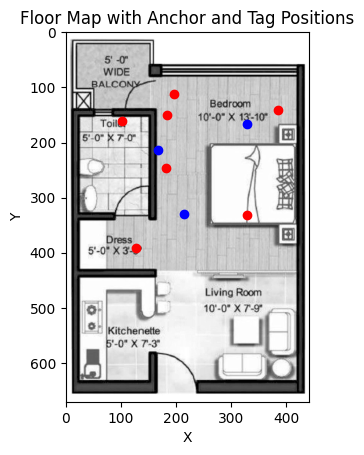

Optimized Anchor Positions for 3 Anchors:
Anchor 1: (166.50001651924072, 213.50002217189063)
Anchor 2: (329.5000024000591, 166.49997207437872)
Anchor 3: (213.49997274985293, 329.4999999603107)


In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions):
    # Calculate the minimum distance between any tag and an anchor
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in all_tag_positions]
        min_distances.append(min(distances))
    # The error is the sum of these minimum distances
    return sum(min_distances)

# Modify the optimize_anchor_positions function to randomize initial positions
def optimize_anchor_positions(anchor_positions, num_anchors):
    optimized_positions = []
    bounds = [(0, max(floor_map_image.shape))] * len(anchor_positions) * 2
    for _ in range(num_anchors):
        # Randomly initialize anchor positions within the bounds
        initial_guess = np.random.uniform(0, max(floor_map_image.shape), size=(len(anchor_positions), 2))
        initial_guess = initial_guess.flatten()
        result = minimize(uwb_localization_error, initial_guess, bounds=bounds, method='Nelder-Mead')
        optimized_positions.append(result.x.reshape((-1, 2)))
    return optimized_positions

# Input number of tags
num_tags = int(input("Enter the number of tags: "))

# Generate random tag positions
all_tag_positions = np.random.randint(100, 400, size=(num_tags, 2))
print(f"\nTag Positions:")
for i, pos in enumerate(all_tag_positions):
    print(f"Tag {i+1}: ({pos[0]}, {pos[1]})")
# Input number of anchors
num_anchors = int(input("Enter the number of anchors: "))

# Optimize anchor positions
optimized_positions = optimize_anchor_positions(anchor_positions, num_anchors)

# Plot the floor map
plt.imshow(floor_map_image, cmap='gray')
plt.title('Floor Map with Anchor and Tag Positions')
plt.xlabel('X')
plt.ylabel('Y')

# Plot anchor positions
for i, positions in enumerate(optimized_positions):
    for pos in positions:
        plt.plot(pos[0], pos[1], 'bo')  # Blue color for anchor positions

# Plot tag positions
for pos in all_tag_positions:
    plt.plot(pos[0], pos[1], 'ro')  # Red color for tag positions

plt.show()

# Print out the optimized positions
print(f"Optimized Anchor Positions for {num_anchors} Anchors:")
for i, positions in enumerate(optimized_positions):
    for j, pos in enumerate(positions):
        anchor_number = i + j*num_anchors + 1
        print(f"Anchor {anchor_number}: ({pos[0]}, {pos[1]})")


Enter the number of tags: 7


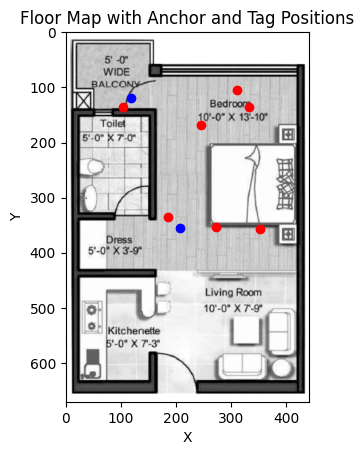

Optimized Anchor Positions for 2 Anchors:
Anchor 1: (118.99996264063469, 118.99999596279923)
Anchor 2: (206.9999672730725, 354.9999954561899)

Tag Positions:
Tag 1: (103, 135)
Tag 2: (353, 357)
Tag 3: (332, 136)
Tag 4: (185, 335)
Tag 5: (310, 105)
Tag 6: (273, 354)
Tag 7: (245, 169)


In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

if floor_map_image is None:
    print("Error: Unable to load the floor map image.")
    exit()

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours are found
if not contours:
    print("Error: No contours found in the binary map.")
    exit()

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions):
    # Calculate the minimum distance between any tag and an anchor
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in all_tag_positions]
        min_distances.append(min(distances))
    # The error is the sum of these minimum distances
    return sum(min_distances)

# Modify the optimize_anchor_positions function to automatically determine the number of anchors
# Modify the optimize_anchor_positions function to automatically determine the number of anchors (minimum 2)
def optimize_anchor_positions(anchor_positions):
    num_anchors = max(2, len(anchor_positions) // len(all_tag_positions))
    optimized_positions = []
    bounds = [(0, max(floor_map_image.shape))] * len(anchor_positions) * 2
    for _ in range(num_anchors):
        # Randomly initialize anchor positions within the bounds
        initial_guess = np.random.uniform(0, max(floor_map_image.shape), size=(len(anchor_positions), 2))
        initial_guess = initial_guess.flatten()
        result = minimize(uwb_localization_error, initial_guess, bounds=bounds, method='Nelder-Mead')
        optimized_positions.append(result.x.reshape((-1, 2)))
    return optimized_positions


# Input number of tags
num_tags = int(input("Enter the number of tags: "))

# Generate random tag positions
all_tag_positions = np.random.randint(100, 400, size=(num_tags, 2))

# Optimize anchor positions
optimized_positions = optimize_anchor_positions(anchor_positions)

# Plot the floor map
plt.imshow(floor_map_image, cmap='gray')
plt.title('Floor Map with Anchor and Tag Positions')
plt.xlabel('X')
plt.ylabel('Y')

# Plot anchor positions
for i, positions in enumerate(optimized_positions):
    for pos in positions:
        plt.plot(pos[0], pos[1], 'bo')  # Blue color for anchor positions

# Plot tag positions
for pos in all_tag_positions:
    plt.plot(pos[0], pos[1], 'ro')  # Red color for tag positions

plt.show()

# Print out the optimized positions
print(f"Optimized Anchor Positions for {len(optimized_positions)} Anchors:")
for i, positions in enumerate(optimized_positions):
    for j, pos in enumerate(positions):
        anchor_number = i + j * len(optimized_positions) + 1
        print(f"Anchor {anchor_number}: ({pos[0]}, {pos[1]})")

print(f"\nTag Positions:")
for i, pos in enumerate(all_tag_positions):
    print(f"Tag {i+1}: ({pos[0]}, {pos[1]})")


Enter the number of tags: 7


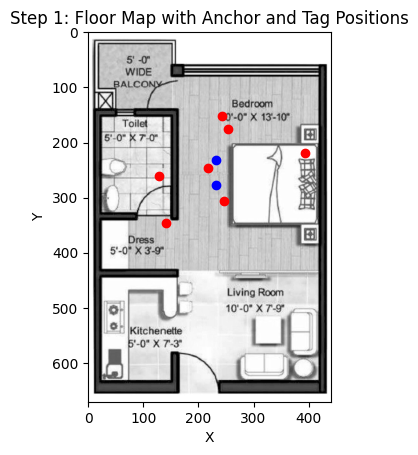

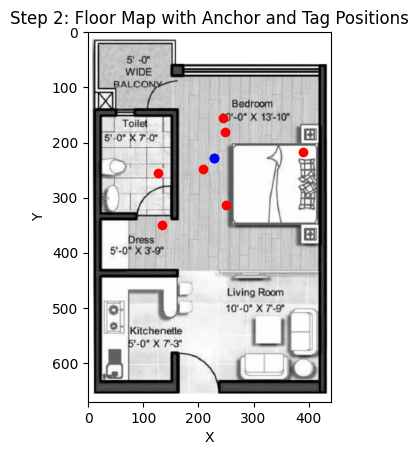

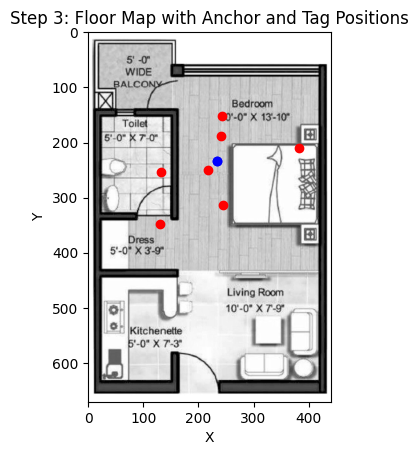

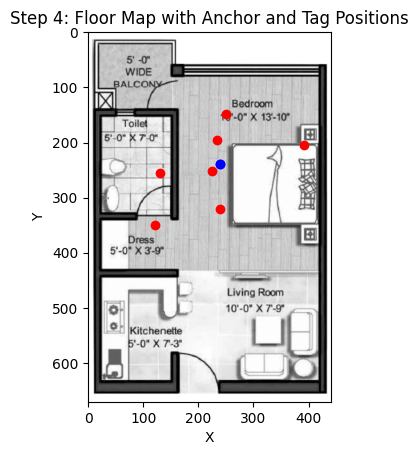

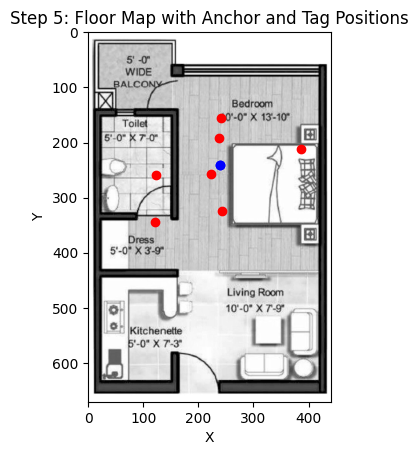

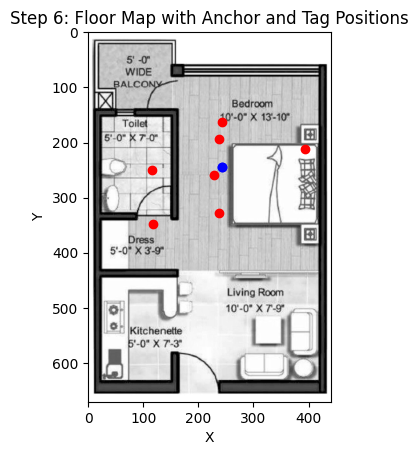

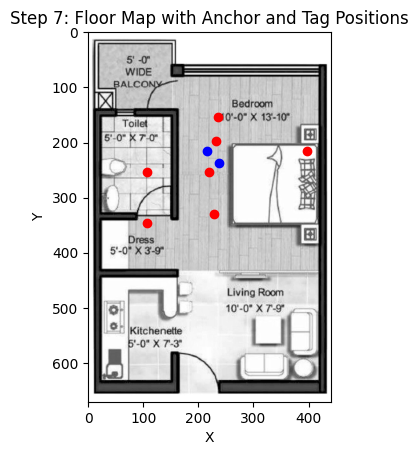

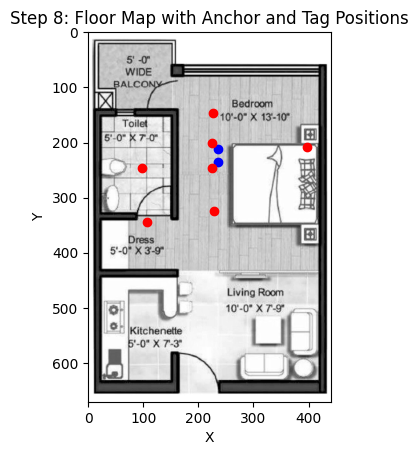

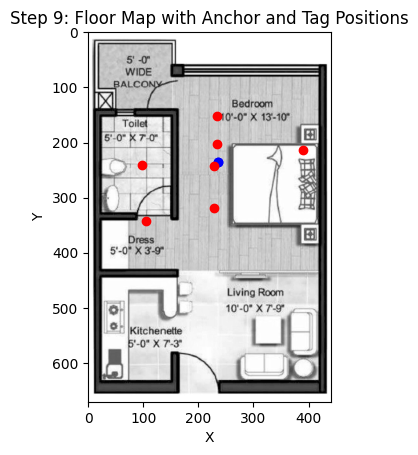

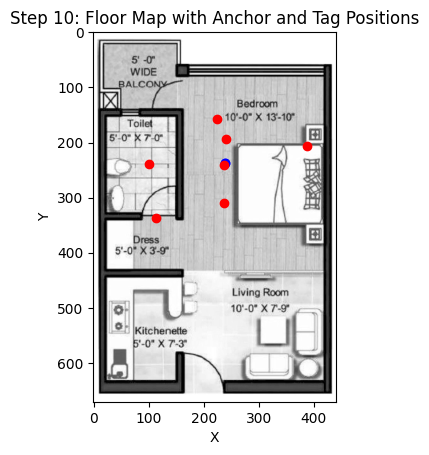

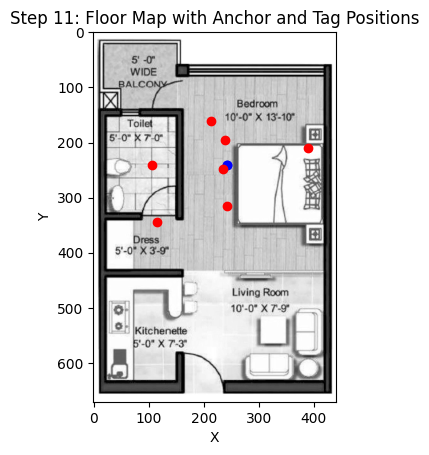

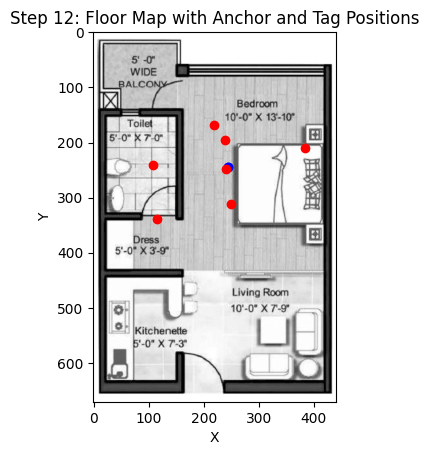

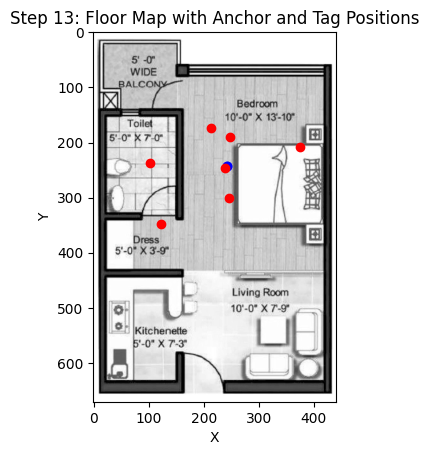

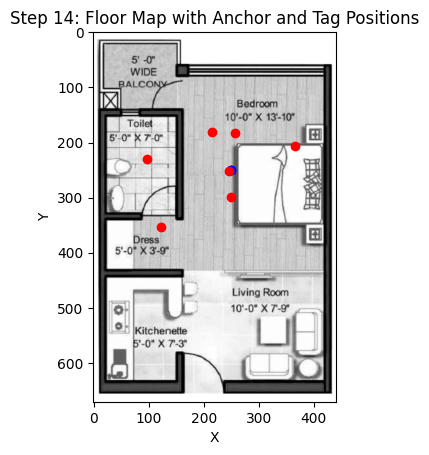

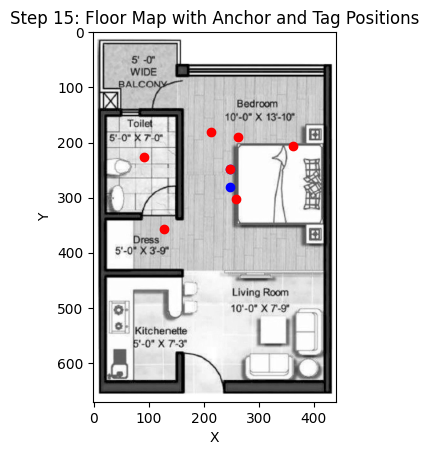

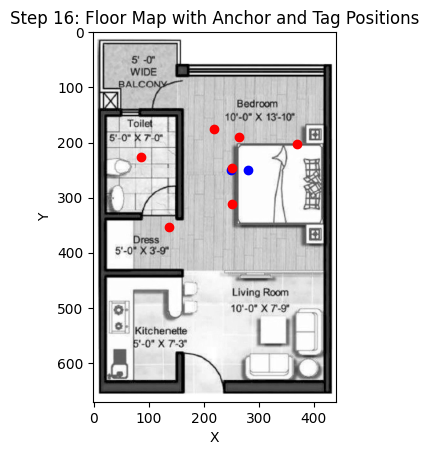

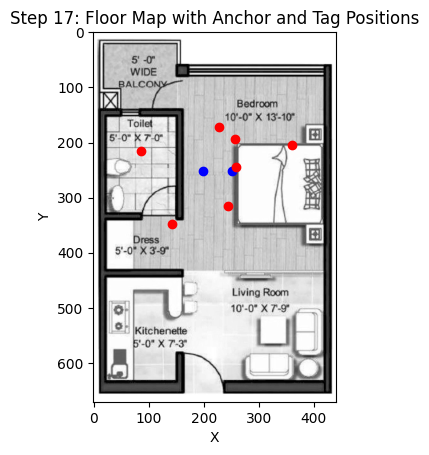

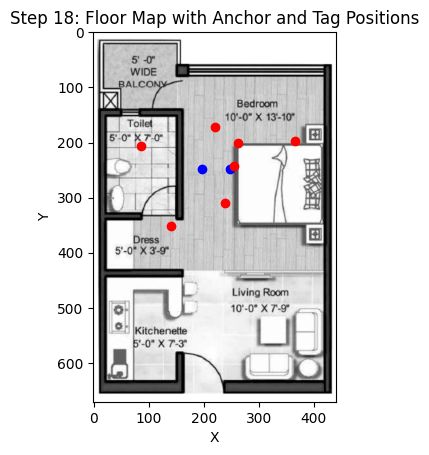

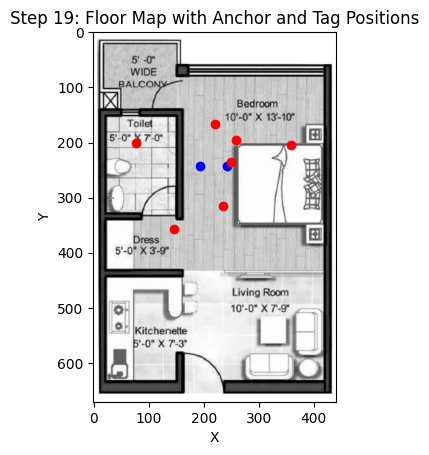

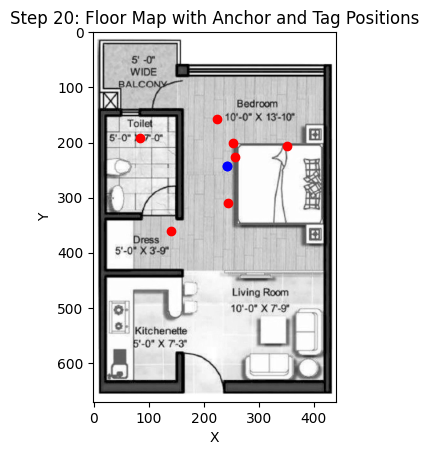

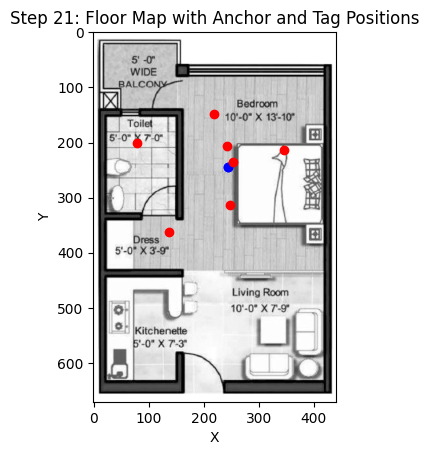

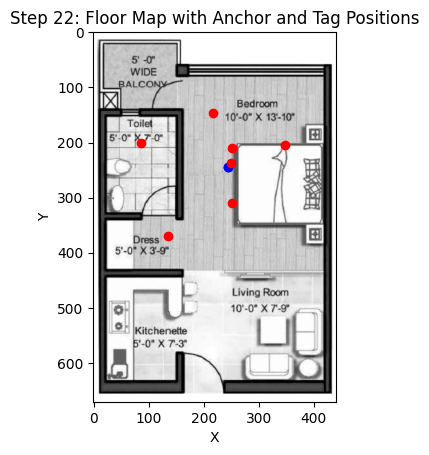

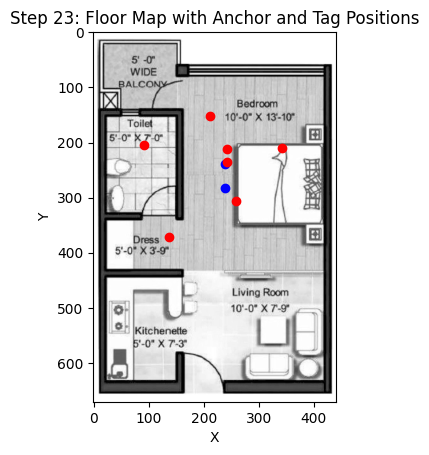

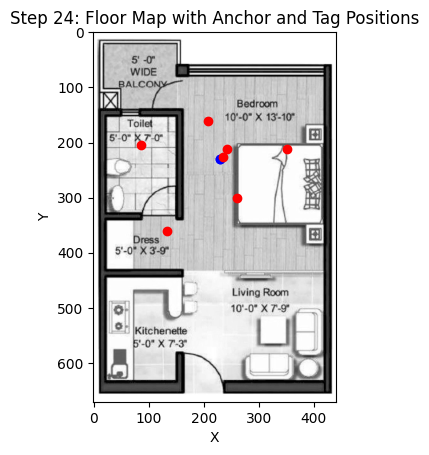

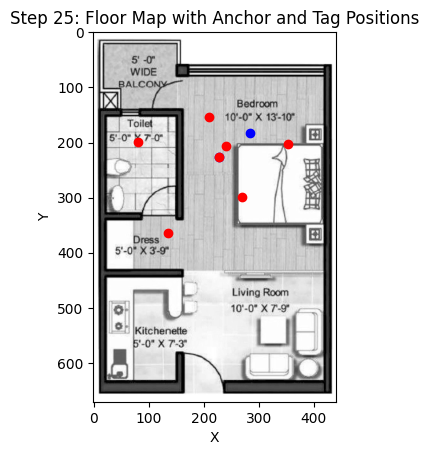

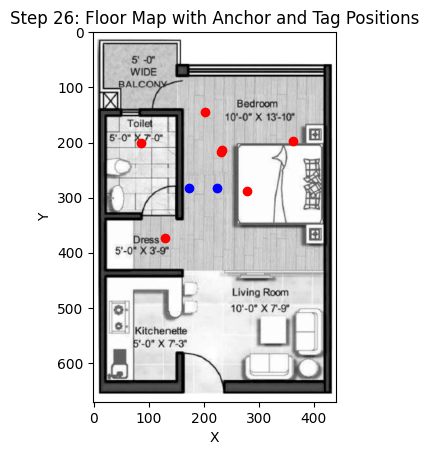

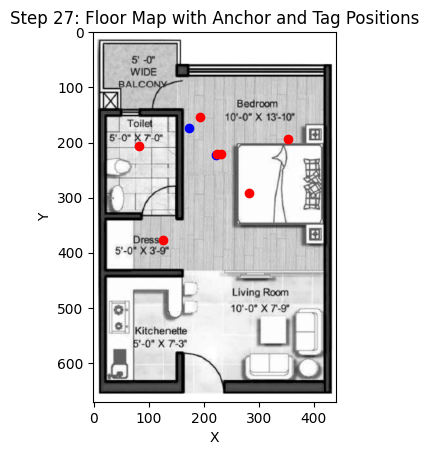

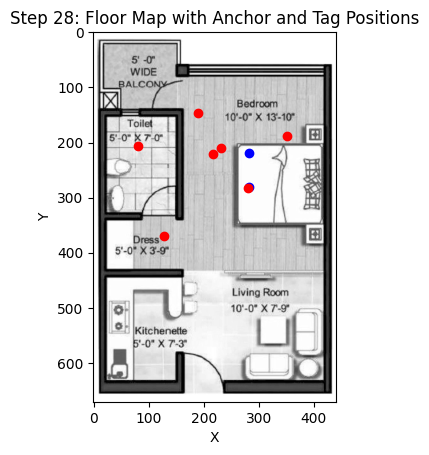

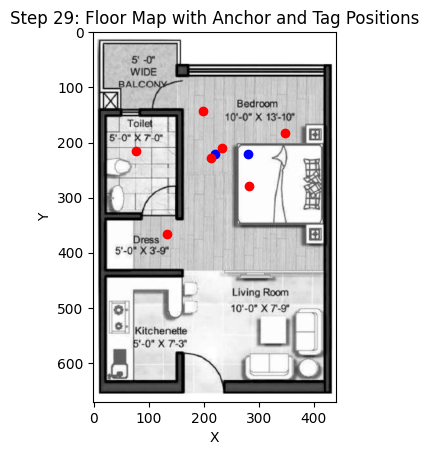

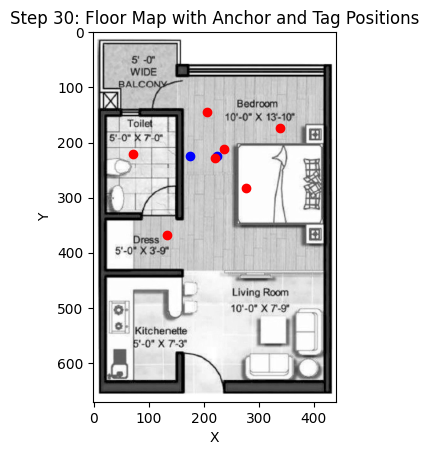

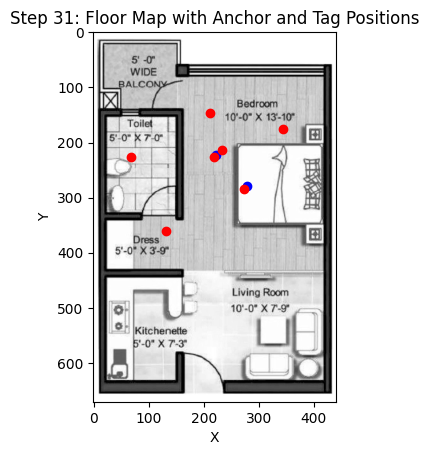

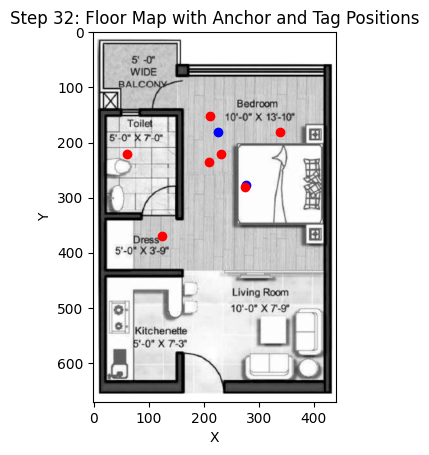

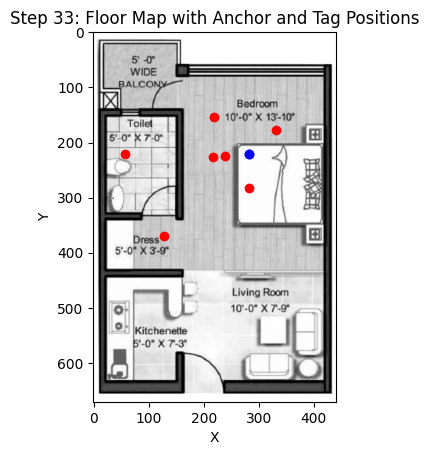

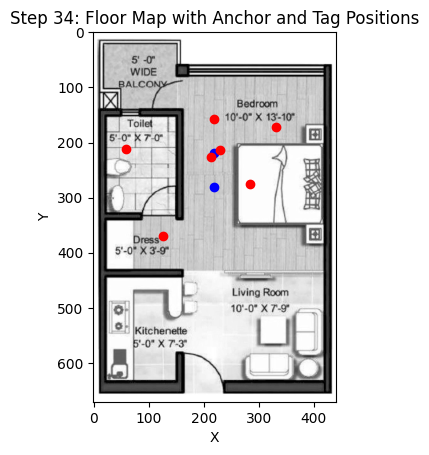

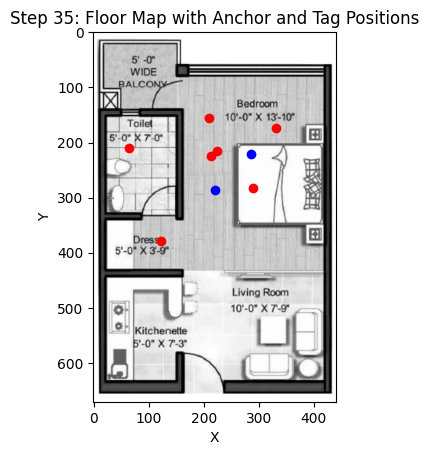

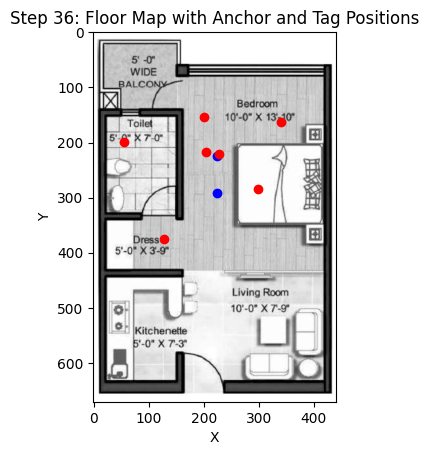

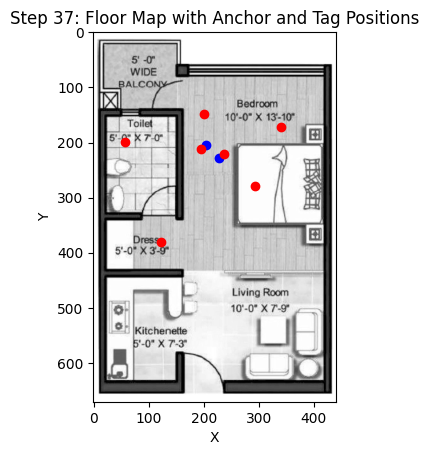

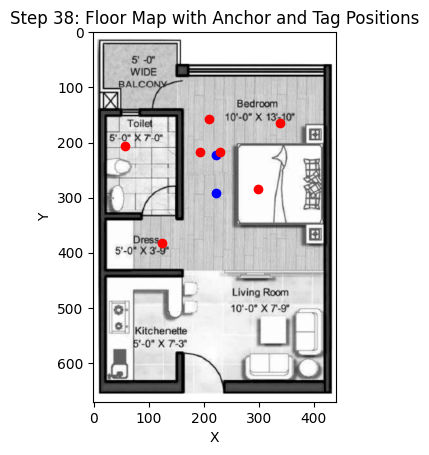

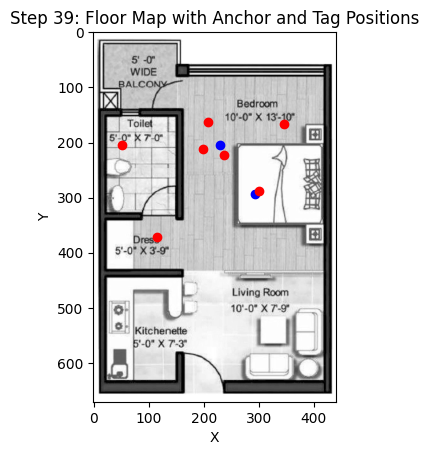

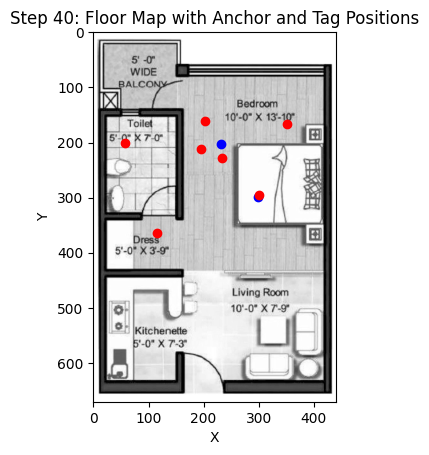

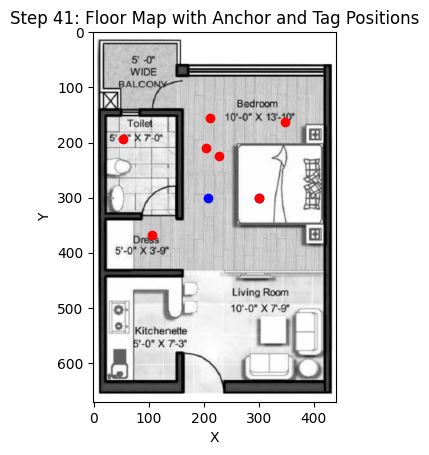

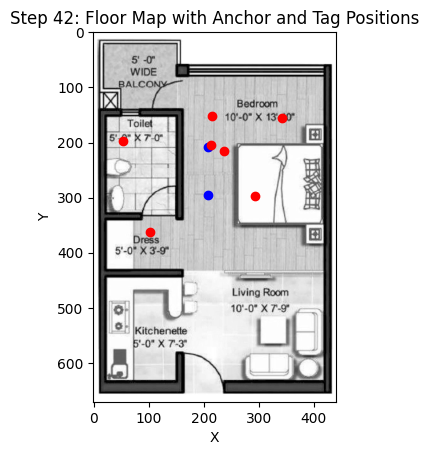

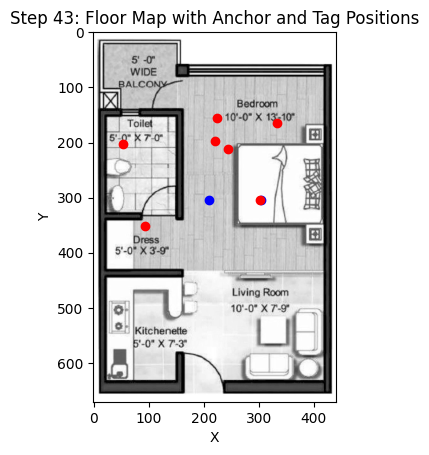

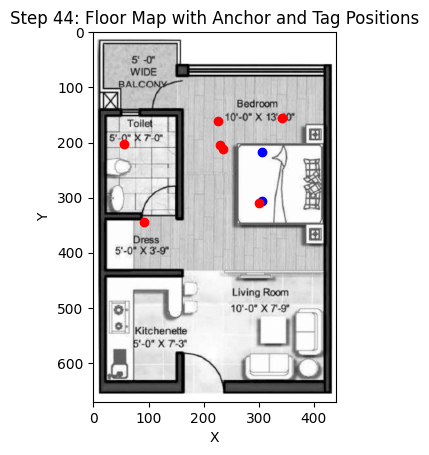

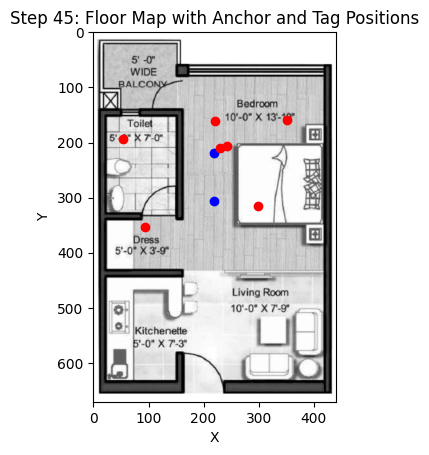

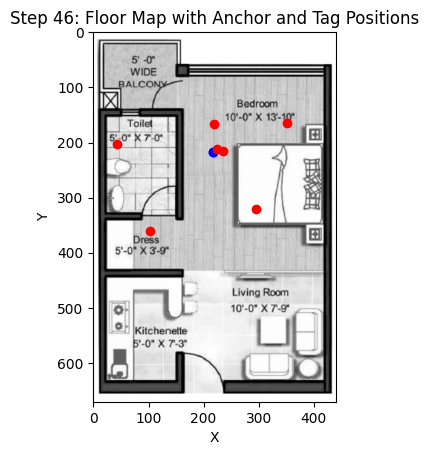

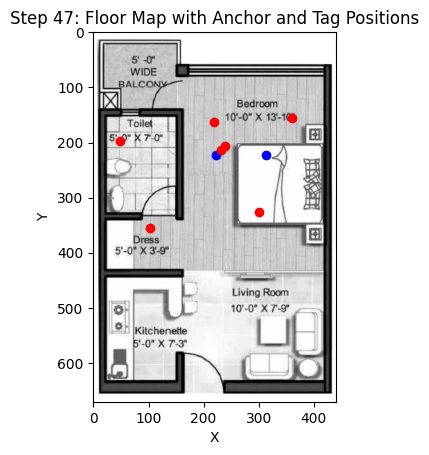

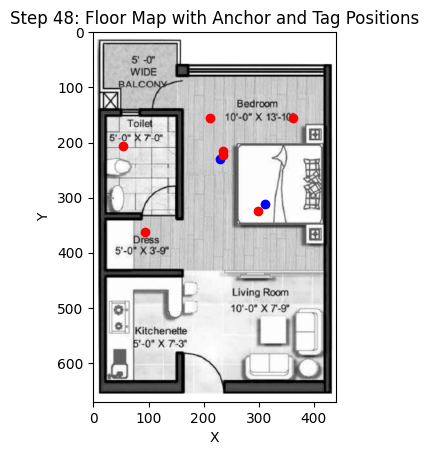

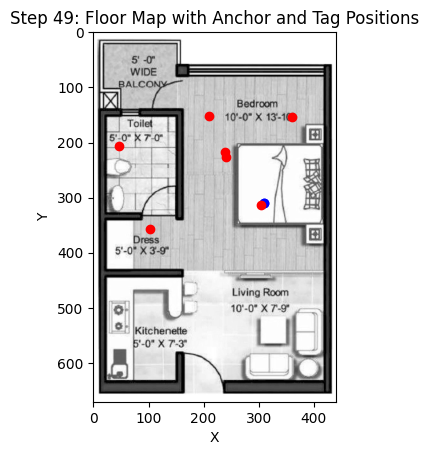

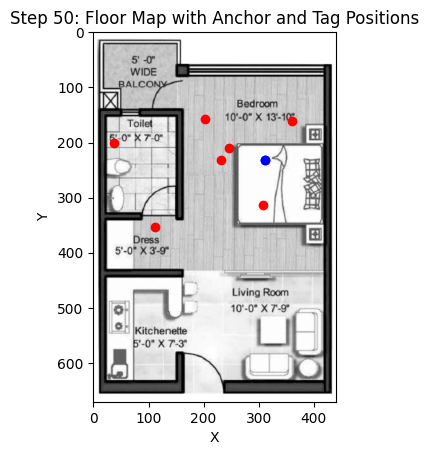

Final Optimized Anchor Positions for 2 Anchors:
Anchor 1: (310.9999708448881, 232.00000000148623)
Anchor 2: (311.00002035418515, 231.9999999988599)


In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

if floor_map_image is None:
    print("Error: Unable to load the floor map image.")
    exit()

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours are found
if not contours:
    print("Error: No contours found in the binary map.")
    exit()

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions, tag_positions):
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in tag_positions]
        min_distances.append(min(distances))
    return sum(min_distances)

# Function to optimize anchor positions for given tag positions
def optimize_anchor_positions(anchor_positions, tag_positions):
    num_anchors = max(2, len(anchor_positions) // len(tag_positions))
    optimized_positions = []
    bounds = [(0, max(floor_map_image.shape))] * len(anchor_positions) * 2
    for _ in range(num_anchors):
        initial_guess = np.random.uniform(0, max(floor_map_image.shape), size=(len(anchor_positions), 2))
        initial_guess = initial_guess.flatten()
        result = minimize(uwb_localization_error, initial_guess, args=(tag_positions,), bounds=bounds, method='Nelder-Mead')
        optimized_positions.append(result.x.reshape((-1, 2)))
    return optimized_positions

# Input number of tags
num_tags = int(input("Enter the number of tags: "))

# Generate initial random tag positions
all_tag_positions = np.random.randint(100, 400, size=(num_tags, 2))

# Number of steps for tag movement
num_steps = 50

# Generate empty list to store tag positions at each step
tag_positions_history = [all_tag_positions]

# Iterate through steps
for step in range(num_steps):
    # Simulate tag movement by adding random displacement to current tag positions
    tag_displacement = np.random.randint(-10, 10, size=(num_tags, 2))
    all_tag_positions += tag_displacement

    # Optimize anchor positions for current tag positions
    optimized_positions = optimize_anchor_positions(anchor_positions, all_tag_positions)

    # Store current tag positions
    tag_positions_history.append(all_tag_positions.copy())

    # Plot the floor map with anchor and tag positions
    plt.imshow(floor_map_image, cmap='gray')
    plt.title(f'Step {step+1}: Floor Map with Anchor and Tag Positions')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot anchor positions
    for positions in optimized_positions:
        for pos in positions:
            plt.plot(pos[0], pos[1], 'bo')  # Blue color for anchor positions

    # Plot tag positions
    for pos in all_tag_positions:
        plt.plot(pos[0], pos[1], 'ro')  # Red color for tag positions

    plt.show()

# Print out the final optimized anchor positions
print(f"Final Optimized Anchor Positions for {len(optimized_positions)} Anchors:")
for i, positions in enumerate(optimized_positions):
    for j, pos in enumerate(positions):
        anchor_number = i + j * len(optimized_positions) + 1
        print(f"Anchor {anchor_number}: ({pos[0]}, {pos[1]})")


Enter the number of tags: 7


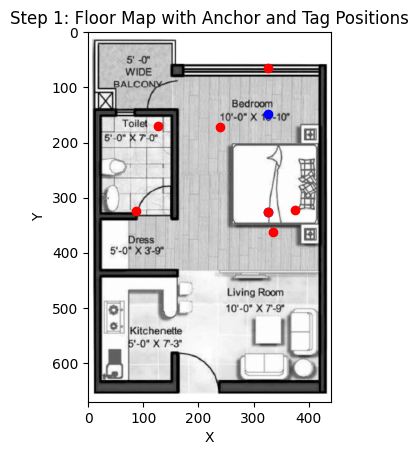

In [ ]:
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Load the floor map image
floor_map_image = cv2.imread("/content/floor_map_1.png", cv2.IMREAD_GRAYSCALE)

if floor_map_image is None:
    print("Error: Unable to load the floor map image.")
    exit()

# Thresholding to extract features from the floor map
_, binary_map = cv2.threshold(floor_map_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary map
contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours are found
if not contours:
    print("Error: No contours found in the binary map.")
    exit()

# Calculate centroids of contours to represent anchor positions
anchor_positions = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        anchor_positions.append((cX, cY))

# Define the UWB localization error function
def uwb_localization_error(anchor_positions, tag_positions):
    min_distances = []
    for anchor_pos in anchor_positions:
        distances = [np.linalg.norm(np.array(anchor_pos) - np.array(tag_pos)) for tag_pos in tag_positions]
        min_distances.append(min(distances))
    return sum(min_distances)

# Function to optimize anchor positions for given tag positions
def optimize_anchor_positions(anchor_positions, tag_positions):
    num_anchors = max(2, len(anchor_positions) // len(tag_positions))
    optimized_positions = []
    bounds = [(0, max(floor_map_image.shape))] * len(anchor_positions) * 2
    for _ in range(num_anchors):
        initial_guess = np.random.uniform(0, max(floor_map_image.shape), size=(len(anchor_positions), 2))
        initial_guess = initial_guess.flatten()
        result = minimize(uwb_localization_error, initial_guess, args=(tag_positions,), bounds=bounds, method='Nelder-Mead')
        optimized_positions.append(result.x.reshape((-1, 2)))
    return optimized_positions

# Input number of tags
num_tags = int(input("Enter the number of tags: "))

# Generate initial random tag positions
all_tag_positions = np.random.randint(100, 400, size=(num_tags, 2))

# Number of steps for tag movement
num_steps = 50

# Generate empty list to store tag positions at each step
tag_positions_history = [all_tag_positions]

# Function to update plot for each animation frame
def update_plot(step, all_tag_positions):
    plt.clf()
    # Simulate tag movement for current step
    if step > 0:
        tag_displacement = np.random.randint(-10, 10, size=(num_tags, 2))
        all_tag_positions += tag_displacement

    # Optimize anchor positions for current tag positions
    optimized_positions = optimize_anchor_positions(anchor_positions, all_tag_positions)

    # Plot the floor map with anchor and tag positions
    plt.imshow(floor_map_image, cmap='gray')
    plt.title(f'Step {step+1}: Floor Map with Anchor and Tag Positions')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot anchor positions
    for positions in optimized_positions:
        for pos in positions:
            plt.plot(pos[0], pos[1], 'bo')  # Blue color for anchor positions

    # Plot tag positions
    for pos in all_tag_positions:
        plt.plot(pos[0], pos[1], 'ro')  # Red color for tag positions

# Create animation
fig = plt.figure()
animation = FuncAnimation(fig, update_plot, frames=num_steps, interval=200, fargs=(all_tag_positions,))

# Display animation as HTML
html_anim = animation.to_html5_video()
HTML(html_anim)
